In [1]:
from Unu_seesaw_R_imprints import MD, mn4, mn5, mn6
from Unu_seesaw_R_imprints import mlight, R_sp, th1, th2, th3
from sympy import simplify, init_printing
init_printing()

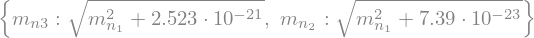

In [2]:
mlight

# Heavy neutrino degenerate

In [3]:
mN_deg = {mn4:mn6, mn5:mn6}

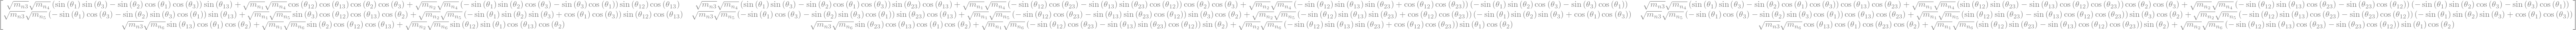

In [4]:
MD

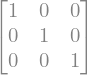

In [5]:
simplify(R_sp.subs({th2:th1, th3:th1}).subs(th1,0.0))

In [6]:
from Unu_seesaw_R_imprints import diagonalizationMnu, Nudata, Mnu
from mpmath import sqrt, mp, nprint
mp.dps = 50 # Aumentar si se necesita más precisión 
d21 = Nudata.squareDm21.central*1e-18
d31 = Nudata.squareDm31.central*1e-18

La siguiente definición para comprobar una igualdad númericamente fue tómada del [pep-0485](https://peps.python.org/pep-0485/)

In [7]:
def isclose(a, b, rel_tol=1e-9, abs_tol=0.0):
    return abs(a-b) <= max( rel_tol * max(abs(a), abs(b)), abs_tol )

In [8]:
mn1_val = 1e-12
mn2_val, mn3_val = sqrt(mn1_val**2 + d21),sqrt(mn1_val**2 + d31)

MN = 1e14
thx = 0.1
thy = 0.2
thz = 0.3
mni, UL, UR = diagonalizationMnu(mn1_val, mn2_val, mn3_val, MN, MN, MN, thx, thy, thz)
nprint(mni[0])
nprint(mn1_val)
print(isclose(mni[0], mn1_val, rel_tol=1e-5))
nprint(mni[1])
nprint(mn2_val)
print(isclose(mni[1], mn2_val, rel_tol=1e-5))
nprint(mni[2])
nprint(mn3_val)
print(isclose(mni[2], mn3_val, rel_tol=1e-5))

eps = 1e-3

(1.0e-12 + 5.78874e-63j)
1e-12
True
(8.65448e-12 + 1.70063e-62j)
8.65448e-12
True
(5.02394e-11 - 1.69547e-60j)
5.02394e-11
True


In [79]:
all([
    isclose(mni[0], mn1_val, rel_tol=1e-3), 
    isclose(mni[1], mn2_val, rel_tol=1e-3),
    isclose(mni[2], mn3_val, rel_tol=1e-3),
    isclose(mni[3], MN, rel_tol=1e-3),
    isclose(mni[4], MN, rel_tol=1e-3),
    isclose(mni[5], MN, rel_tol=1e-3)
    ])

True

In [9]:
def eigenvalores_masas_son_cercanas(MN, thx, thy, thz, eps=1e-6):
    mni, UL, UR = diagonalizationMnu(mn1_val, mn2_val, mn3_val, MN, MN, MN, thx, thy, thz)
    return all([
        isclose(mni[0], mn1_val, rel_tol=eps), 
        isclose(mni[1], mn2_val, rel_tol=eps),
        isclose(mni[2], mn3_val, rel_tol=eps),
        isclose(mni[3], MN, rel_tol=eps),
        isclose(mni[4], MN, rel_tol=eps),
        isclose(mni[5], MN, rel_tol=eps)
    ])

La forma de la matriz de masas es la siguiente

In [10]:
MN = 1e6
th = 0.3
nprint(Mnu(mn1_val, mn2_val, mn3_val, MN, MN, MN, th, th, th))

[                 0.0                   0.0                  0.0  (0.0 - 3.62762e-5j)   (0.0 - 0.00190459j)  (0.0 + 0.000181666j)]
[                 0.0                   0.0                  0.0  (0.0 + 0.00128005j)  (0.0 - 0.000767067j)    (0.0 - 0.0033735j)]
[                 0.0                   0.0                  0.0  (0.0 + 0.00166833j)   (0.0 + 0.00504795j)   (0.0 + 0.00378941j)]
[ (0.0 - 3.62762e-5j)   (0.0 + 0.00128005j)  (0.0 + 0.00166833j)               1.0e+6                   0.0                   0.0]
[ (0.0 - 0.00190459j)  (0.0 - 0.000767067j)  (0.0 + 0.00504795j)                  0.0                1.0e+6                   0.0]
[(0.0 + 0.000181666j)    (0.0 - 0.0033735j)  (0.0 + 0.00378941j)                  0.0                   0.0                1.0e+6]
(1.0e-12 - 9.49221e-63j)
(8.65448e-12 + 2.92431e-62j)
(5.02394e-11 - 7.58946e-61j)
(1.0e+6 - 3.29949e-46j)
(1.0e+6 + 1.68647e-46j)
(1.0e+6 + 6.85399e-47j)


Probando la función de diagonalizacón para diferentes valores de M,  y th1, th2, th3

In [11]:
bool_list = []
for M in [1e9, 1e10, 1e11, 1e14]:
    for th1 in [0.1, 0.3, 0.5, 0.7, 0.9]:
        for th2 in [0.1, 0.3, 0.5, 0.7, 0.9]:
            for th3 in [0.1, 0.3, 0.5, 0.7, 0.9]:
                bool_list.append(eigenvalores_masas_son_cercanas(M, th1, th2, th3))
all(bool_list)

True

In [12]:
bool_list

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,